# predicting employee salaries at TechWorks Consulting using Regression

# Data Loading

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
ml_case_study=pd.read_excel(r'C:\Users\umade\Downloads\ml_case_study.xlsx',header=0)
ml_case_study.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [207]:
colleges=pd.read_excel(r'C:\Users\umade\Downloads\Colleges.xlsx',header=0)
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [208]:
cities=pd.read_excel(r'C:\Users\umade\Downloads\cities.xlsx',header=0)
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [209]:
ml_case_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


In [210]:
ml_case_study.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [211]:
ml_case_study.describe(include=object)

,College,City,Role
count,1589,1589,1589
unique,66,15,2
top,"KIIT, Bhubaneswar",Durgapur,Executive
freq,40,123,1261


In [212]:
ml_case_study.shape

(1589, 8)

# Data Preprocessing

In [213]:
ml_case_study.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

#There are no missing values

In [214]:
correlation=ml_case_study.corr()
correlation

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000


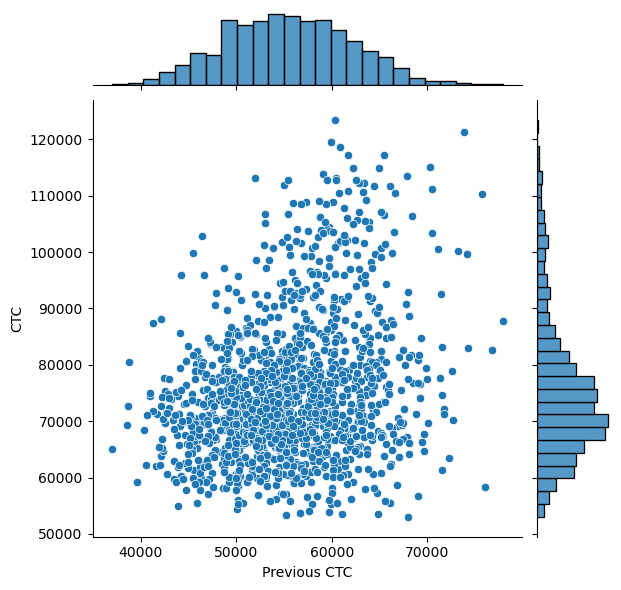

In [215]:
sns.jointplot(x="Previous CTC",y="CTC",data=ml_case_study)

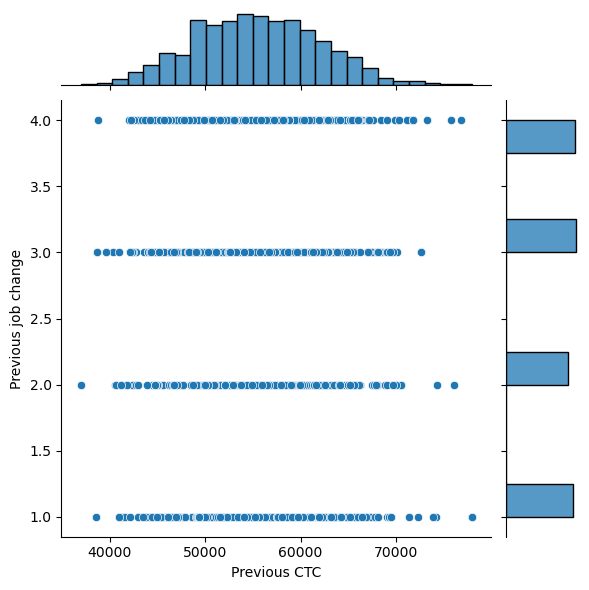

In [216]:
sns.jointplot(x="Previous CTC",y="Previous job change",data=ml_case_study)

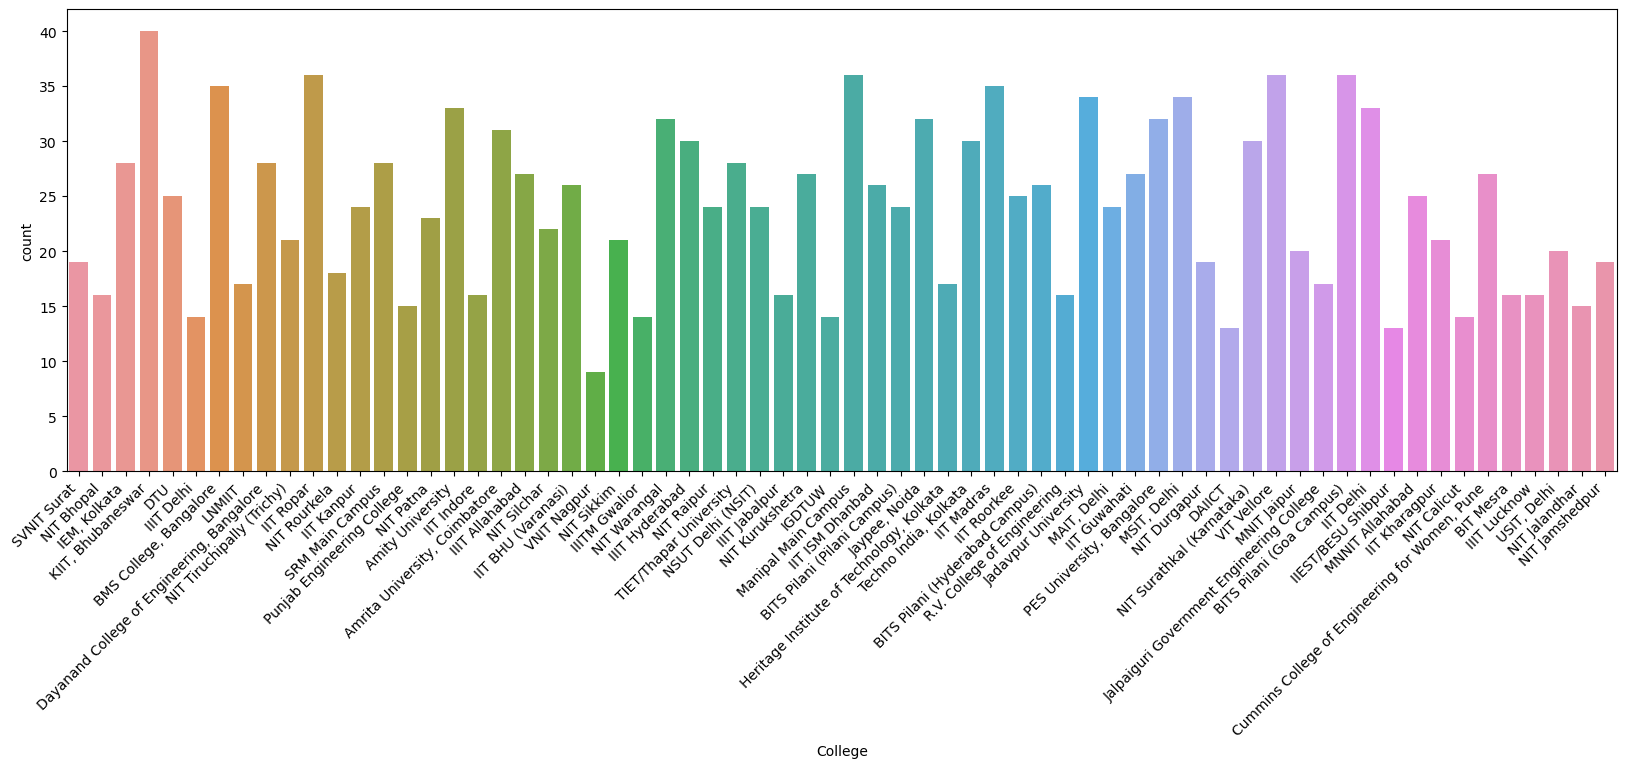

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.countplot(x="College",data=ml_case_study)
plt.xticks(rotation=45, ha='right')
plt.show()


<AxesSubplot:xlabel='Role', ylabel='count'>

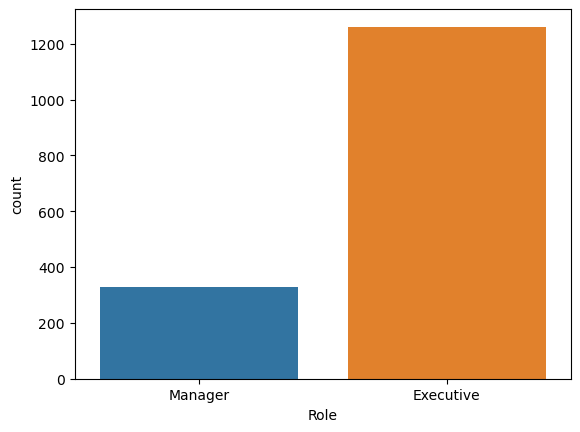

In [218]:
sns.countplot(x="Role",data=ml_case_study)

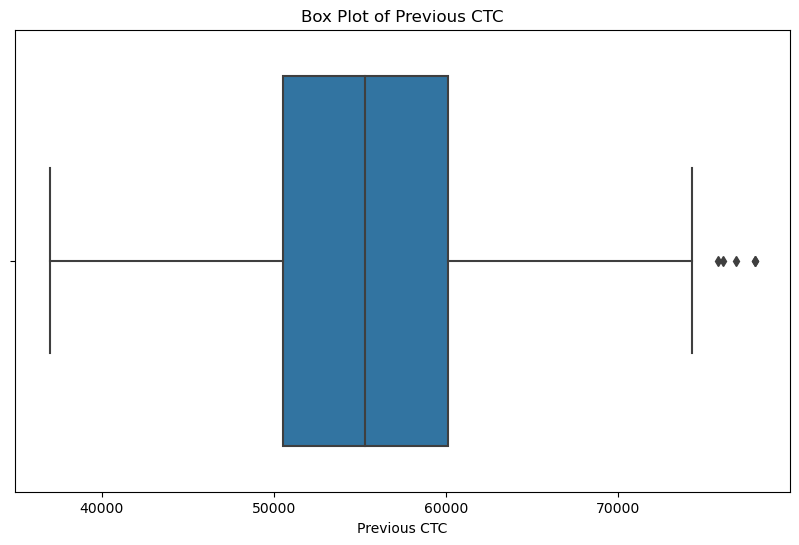

In [219]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ml_case_study['Previous CTC'])
plt.title('Box Plot of Previous CTC')
plt.show()

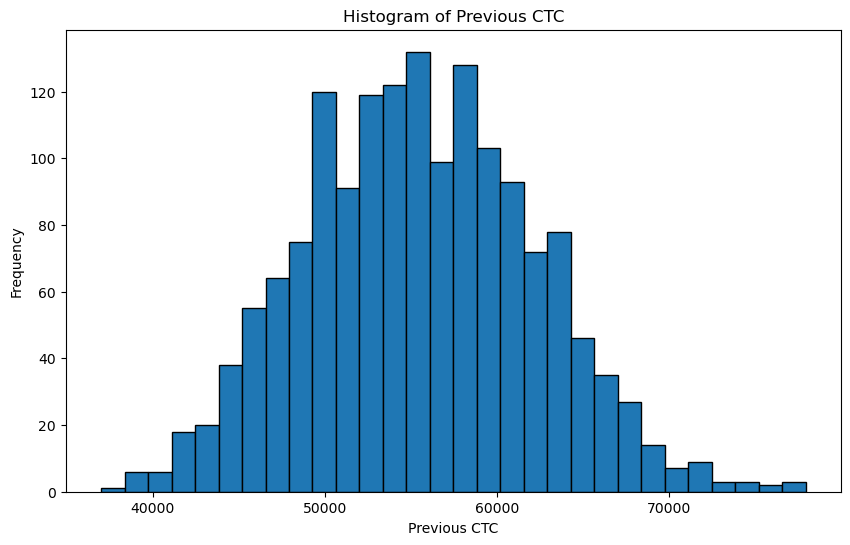

In [220]:
plt.figure(figsize=(10, 6))
plt.hist(ml_case_study['Previous CTC'], bins=30, edgecolor='k')
plt.title('Histogram of Previous CTC')
plt.xlabel('Previous CTC')
plt.ylabel('Frequency')
plt.show()

# Encoding Categorical variables

In [221]:
colleges.columns

Index(['Tier 1', 'Tier 2', 'Tier 3'], dtype='object')

In [222]:
cities.columns

Index(['Metrio City', 'non-metro cities'], dtype='object')

In [223]:
ml_case_study.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [224]:
# Create a mapping dictionary
city_mapping = {}

# Fill the dictionary based on 'Metro City' and 'Non-Metro City'
for city in cities['Metrio City'].dropna():
    city_mapping[city] = 1
for city in cities['non-metro cities'].dropna():
    city_mapping[city] = 0
# Map the city names in the ml_case_study dataset to numerical values
ml_case_study['City'] = ml_case_study['City'].map(city_mapping)

# Verify the mapping
print("City mapping:")
print(ml_case_study[['City']].head())


City mapping:
   City
0     0
1     0
2     0
3     0
4     0


In [225]:
# Create a mapping dictionary
college_mapping = {}

# Fill the dictionary based on 'Metro City' and 'Non-Metro City'
for college in colleges['Tier 1'].dropna():
    college_mapping[college] = 3
for college in colleges['Tier 2'].dropna():
    college_mapping[college] = 2
for college in colleges['Tier 3'].dropna():
    college_mapping[college] = 1
# Map the city names in the ml_case_study dataset to numerical values
ml_case_study['College'] = ml_case_study['College'].map(college_mapping)

# Verify the mapping
print("College mapping:")
print(ml_case_study[['College']].head())

College mapping:
   College
0        2
1        2
2        1
3        1
4        3


In [226]:
ml_case_study.head(20)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,1,0,Executive,60347,2,52,28,76764.02
3,1,0,Executive,49010,2,81,33,82092.39
4,3,0,Executive,57879,4,74,32,73878.10
5,2,0,Executive,54340,4,73,31,59950.89
6,1,1,Executive,60298,1,42,46,66602.34
7,2,1,Executive,49944,2,56,37,57768.44
8,1,1,Executive,53124,4,40,37,70083.30
9,3,0,Executive,51141,1,47,60,85648.48


In [227]:
ml_case_study=pd.get_dummies(ml_case_study,columns=["Role"],drop_first=True)

In [228]:
ml_case_study.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406.58,1
1,2,0,57081,1,84,18,68005.87,0
2,1,0,60347,2,52,28,76764.02,0
3,1,0,49010,2,81,33,82092.39,0
4,3,0,57879,4,74,32,73878.10,0


# X-y split

In [229]:
from sklearn.preprocessing import StandardScaler
X = ml_case_study.drop('CTC', axis=1)
y = ml_case_study['CTC']

In [230]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523,3,66,19,1
1,2,0,57081,1,84,18,0
2,1,0,60347,2,52,28,0
3,1,0,49010,2,81,33,0
4,3,0,57879,4,74,32,0


In [231]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [232]:
X.shape

(1589, 7)

In [233]:
y.shape

(1589,)

In [234]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [235]:
#Handling Outliers
import numpy as np
Q1 = ml_case_study['Previous CTC'].quantile(0.25)
Q3 = ml_case_study['Previous CTC'].quantile(0.75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
filtered_entries = ~((ml_case_study['Previous CTC'] < (Q1 - outlier_step)) | (ml_case_study['Previous CTC'] > (Q3 + outlier_step)))
ml_case_study = ml_case_study[filtered_entries]


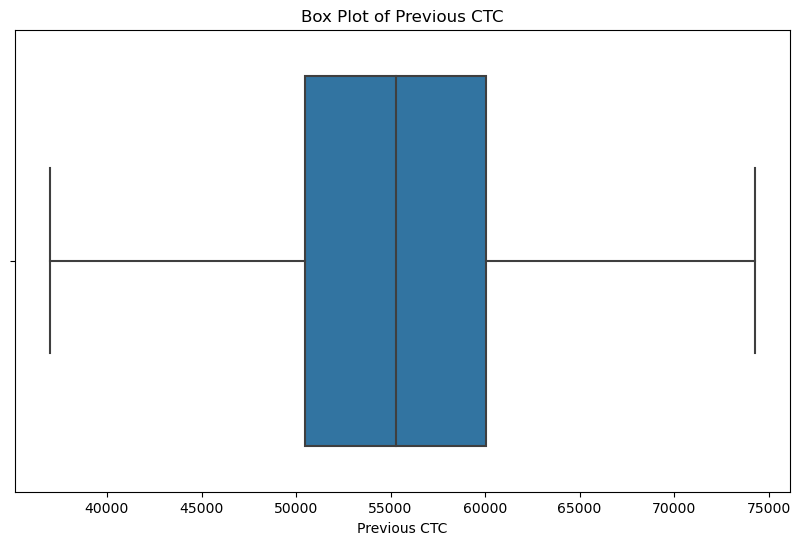

In [236]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ml_case_study['Previous CTC'])
plt.title('Box Plot of Previous CTC')
plt.show()

# Train Test Split

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [238]:
X_train.shape

(1271, 7)

In [239]:
X_test.shape

(318, 7)

In [240]:
#Model Seletion and Trianing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}
print(results)


{'Linear Regression': {'MSE': 68909870.69952506, 'R-squared': 0.5355989894790129}, 'Random Forest': {'MSE': 51040412.769870445, 'R-squared': 0.6560257764654389}}


In [241]:
# Print model performance
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}\n")


Model: Linear Regression
Mean Squared Error: 68909870.69952506
R-squared: 0.5355989894790129

Model: Random Forest
Mean Squared Error: 51040412.769870445
R-squared: 0.6560257764654389



# Optimization

In [242]:
#Improve the model's performance through hyperparameter tuning and feature selection.
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

Best Parameters: {'max_depth': 30, 'n_estimators': 100}
Best Model Mean Squared Error: 51040412.769870445
Best Model R-squared: 0.6560257764654389


# 1.Your Views about the Problem Statement:
Predicting salaries based on multiple features is crucial for fair compensation and efficient hiring.

# 2.Approach to Solving the Task:
1.Load and inspect the data.
2.Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.
3.Train and evaluate different regression models.
4.Optimize the best-performing model using hyperparameter tuning.

# 3.What ML model options did you have available to perform this task?
Linear Regression,
Random Forest Regression,
Gradient Boosting Regression.

# 4.Which model’s performance is best and what could be the possible reason for that?
Best Model’s Performance:
Based on the metrics, the Random Forest model is often preferred for its ability to capture complex, non-linear relationships.

# 5.What steps can you take to improve this selected model’s performance even further?
Improving Model Performance:
Use advanced hyperparameter tuning, try additional features, and use cross-validation to ensure the model's robustness.